In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [ ]:
###更改字型以在圖表上顯示中文
plt.rcParams['font.sans-serif']=['Arial Unicode MS']

# 資料集

In [ ]:
###讀取資料
df = pd.read_csv (r'dataset.csv')
df_history = pd.read_csv (r'TowOfficial.csv')

In [ ]:
###新增weekday欄位
df['weekday']=0

0         0
1         0
2         0
3         0
4         0
         ..
106857    0
106858    0
106859    0
106860    0
106861    0
Name: weekday_0, Length: 106862, dtype: int64

In [ ]:
###將dummy variable轉成weekday變數
for i in range(106861):
    for k in range(208,215):
        if df.iloc[i,k] == 1:
            if k == 208:
                df['weekday'][i]= 6
            else:
                df['weekday'][i]= k-209

<ipython-input-665-148eabe2cce9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'][i]= k-209
<ipython-input-665-148eabe2cce9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'][i]= 6


In [ ]:
###youbike各站點使用量與周圍拖吊量
place_count=[0]*52 
place_count_Youbike=[0]*52 

for i in range(156,208):
    for k in range(106862):
        if df.iloc[k,i]==1:
            place_count[i-156] += df.iloc[k,3]
            place_count_Youbike[i-156] += abs(df.iloc[k,6]-df.iloc[k,2])

In [ ]:
### 建立Youbike站點資料
place_name = ['一號館', '二號館', '五號館西側', '公館停車場西北側', '共同教室北側', '共同教室東南側', '凝態館南側', '卓越研究大樓', '博理館西側', 
 '博雅館西側', '原分所北側', '四號館東北側', '圖資系館北側', '土木系館', '大一女舍北側', '天文數學館南側', '女九舍西南側', '小小福西南側', 
 '小福樓東側', '工綜館南側', '心理系館南側', '思亮館東南側', '教研館北側', '新生教室南側', '新體育館東南側', '明達館機車停車場', '森林館北側', '椰林小舖', 
 '樂學館東側', '檔案展示館', '水源修齊會館', '水源舍區A棟', '水源舍區B棟', '獸醫館南側', '生命科學館西北側', '男八舍東側', '社會系館南側', 
 '社科院西側', '禮賢樓東南側','立體機車停車場', '第一活動中心西南側', '第二行政大樓南側', '管理學院二館北側', '總圖書館西南側', '舊體育館西側', '計資中心南側', '農化新館西側', '農業陳列館北側', 
 '鄭江樓北側', '電機二館東南側', '鹿鳴堂東側','黑森林西側']


place_count_df = pd.DataFrame(
    {'place name': place_name,
     '拖吊量': place_count,
     'Youbike使用量': place_count_Youbike})

各站點Youbike使用量

In [ ]:
place_count_df =place_count_df.sort_values(by=['Youbike使用量'], ascending=False)
place_count_df_new = place_count_df.reset_index(drop = True)
place_count_df_new

,place name,拖吊量,Youbike使用量
0,第一活動中心西南側,50.0,4906.0
1,社科院西側,9.0,3635.0
2,小福樓東側,182.0,3548.0
3,新體育館東南側,4.0,3428.0
4,大一女舍北側,602.0,3317.0
5,工綜館南側,3.0,3246.0
6,女九舍西南側,1.0,2979.0
7,舊體育館西側,39.0,2905.0
8,農業陳列館北側,2.0,2880.0
9,水源舍區B棟,0.0,2608.0


In [ ]:
### 建立時間list (24小時，每15分鐘為一單位)
time=[]
for i in range(0,24):
    for k in range(0,4):
        if k == 0:
            t= (str(i)+ ":00")
        else:
            t= (str(i)+ ":"+str(k*15))
        time.append(t)

In [ ]:
###各時間拖吊數量
time_list=[0]*96
for i in range(60,156):
    for k in range(106862):
        if df.iloc[k,i]==1:
            time_list[i-60]+= df.iloc[k,3]

In [ ]:
###各時間Youbike使用量

time_list_Youbike=[0]*96
for i in range(60,156):
    for k in range(106862):
        if df.iloc[k,i]==1:
            time_list_Youbike[i-60]+= abs(df.iloc[k,6]-df.iloc[k,2])

Youbike使用量與資料拖吊量比較

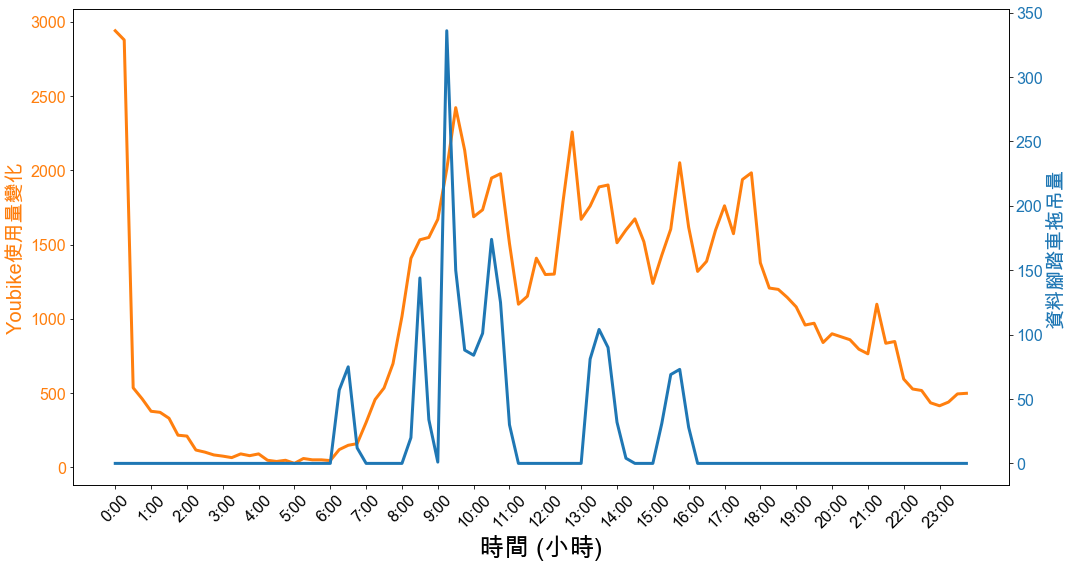

In [ ]:
t = time
data1 = time_list_Youbike
data2 = time_list

fig, ax1 = plt.subplots(1,figsize=(15,8))


for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

color = 'tab:orange'
ax1.set_xlabel('時間 (小時)', fontsize=25)
ax1.set_ylabel('Youbike使用量變化', color=color, fontsize=20)
ax1.plot(t, data1, color=color,lw=3)
ax1.set_xticks(t[::4])
ax1.set_xticklabels(t[::4], rotation=45)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
color = 'tab:blue'
ax2.set_ylabel('資料腳踏車拖吊量', color=color, fontsize=20)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color,lw=3)
ax2.set_xticks(t[::4])
ax2.set_xticklabels(t[::4], rotation=45)
ax2.tick_params(axis='y', labelcolor=color)



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
###各時間Youbike使用量(by weekday)
time_list_Youbike_m=[0]*96
time_list_Youbike_t=[0]*96
time_list_Youbike_w=[0]*96
time_list_Youbike_th=[0]*96
time_list_Youbike_f=[0]*96
time_list_Youbike_s=[0]*96
time_list_Youbike_su=[0]*96

time_list_Youbike_weekday=[0]*96
time_list_Youbike_weekend=[0]*96

for i in range(60,156):
    for k in range(106862):
        if df.iloc[k,i]==1:   
            weekday_i = df['weekday'][k]%7
            if weekday_i==0:
                time_list_Youbike_m[i-60] += abs(df.iloc[k,6]-df.iloc[k,2])/3
                time_list_Youbike_weekday[i-60]+= abs(df.iloc[k,6]-df.iloc[k,2])/17
            elif weekday_i==1:
                time_list_Youbike_t[i-60] += abs(df.iloc[k,6]-df.iloc[k,2])/4
                time_list_Youbike_weekday[i-60]+= abs(df.iloc[k,6]-df.iloc[k,2])/17
            elif weekday_i==2:
                time_list_Youbike_w[i-60] += abs(df.iloc[k,6]-df.iloc[k,2])/4
                time_list_Youbike_weekday[i-60]+= abs(df.iloc[k,6]-df.iloc[k,2])/17
            elif weekday_i==3:
                time_list_Youbike_th[i-60] += abs(df.iloc[k,6]-df.iloc[k,2])/3
                time_list_Youbike_weekday[i-60]+= abs(df.iloc[k,6]-df.iloc[k,2])/17
            elif weekday_i==4:
                time_list_Youbike_f[i-60] += abs(df.iloc[k,6]-df.iloc[k,2])/3
                time_list_Youbike_weekday[i-60]+= abs(df.iloc[k,6]-df.iloc[k,2])/17
            elif weekday_i==5:
                time_list_Youbike_s[i-60] += abs(df.iloc[k,6]-df.iloc[k,2])/3
                time_list_Youbike_weekend[i-60]+= abs(df.iloc[k,6]-df.iloc[k,2])/6
            elif weekday_i==6:
                time_list_Youbike_su[i-60] += abs(df.iloc[k,6]-df.iloc[k,2])/3
                time_list_Youbike_weekend[i-60]+= abs(df.iloc[k,6]-df.iloc[k,2])/6
                

每日Youbike平均使用量 (週間和週末比較)

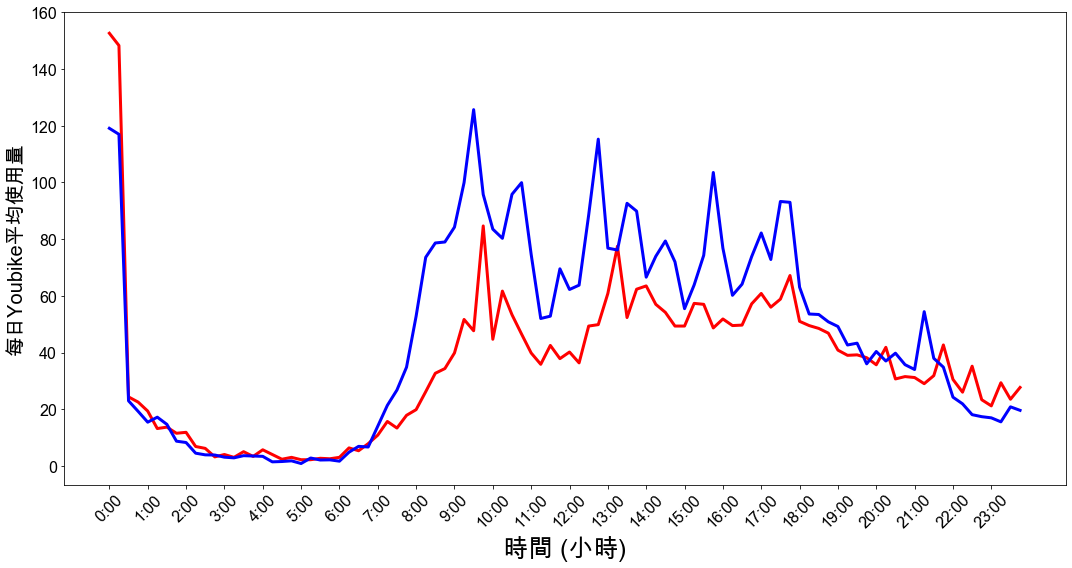

In [ ]:
t = time
fig, ax1 = plt.subplots(1,figsize=(15,8))


for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlabel('時間 (小時)', fontsize=25)
ax1.set_ylabel('每日Youbike平均使用量', color='black', fontsize=20)

ax1.plot(t, time_list_Youbike_weekend, color='red',lw=3)
ax1.plot(t, time_list_Youbike_weekday, color='b',lw=3)

ax1.set_xticks(t[::4])
ax1.set_xticklabels(t[::4], rotation=45)
ax1.tick_params(axis='y', labelcolor='black')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# 歷史拖吊資料

In [ ]:
### 將欄位名稱改為weekday
df_history = df_history.rename({'datetime': 'weekday'}, axis=1)

In [ ]:
### 將日期轉換為對應的星期幾
for i in range(34043):   
    df_history['weekday'][i]= (datetime.strptime(df_history['date'][i][2:], '%y/%m/%d')).weekday()

In [ ]:
### 將timerange轉換為時間的形式
for i in range(34043):   
    df_history['timerange'][i]= str(df_history['timerange'][i])[:-2]+ ":" + str(df_history['timerange'][i])[-2:]

<ipython-input-473-28ab01adac03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_history['timerange'][i]= str(df_history['timerange'][i])[:-2]+ ":" + str(df_history['timerange'][i])[-2:]


In [ ]:
###各weekday的拖吊狀況
weekday_count=[0]*7

for i in range(34043):
    week_i = df_history['weekday'][i]%7
    weekday_count[week_i]+=1

weekday_average=[]
for i in range(7):
    weekday_average.append(weekday_count[i]/144)   

歷史拖吊資料 每星期 日平均拖吊數

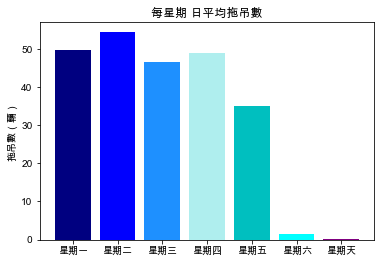

In [ ]:
weekday_name=["星期一","星期二","星期三","星期四","星期五","星期六","星期天",]

x = np.arange(len(weekday_name))
plt.bar(x, weekday_average, color=['navy', 'b', 'dodgerblue', 'paleturquoise','c', 'cyan', 'purple'])
plt.xticks(x, weekday_name)
plt.ylabel('拖吊數（輛）')
plt.title('每星期 日平均拖吊數')
plt.show()

In [ ]:
###建立拖吊站點名稱
place_name_history=[]
for k in range(34043):
    if df_history['place'][k] not in place_name_history:
        place_name_history.append(df_history['place'][k])

In [ ]:
### 依照年份區分
place_count_history_2019=[0]*95
place_count_history_2020=[0]*95
place_count_history_2021=[0]*95


for i in range(34043):
    for k in range(95):
        if df_history['place'][i]== place_name_history[k]:
            if datetime.strptime(df_history['date'][i][2:], '%y/%m/%d')< datetime(2020, 1, 1, 0, 0):
                place_count_history_2019[k]+=1
            elif datetime.strptime(df_history['date'][i][2:], '%y/%m/%d')< datetime(2021, 1, 1, 0, 0):
                place_count_history_2020[k]+=1
            elif datetime.strptime(df_history['date'][i][2:], '%y/%m/%d')< datetime(2022, 1, 1, 0, 0):
                place_count_history_2021[k]+=1

In [ ]:
place_count_history_df = pd.DataFrame(
    {'place name': place_name_history,
     '2019拖吊量': place_count_history_2019,
     '2020拖吊量': place_count_history_2020,
     '2021拖吊量': place_count_history_2021,
     })

In [ ]:
place_count_history_df['拖吊量']= (place_count_history_df['2019拖吊量']+place_count_history_df['2020拖吊量']+place_count_history_df['2021拖吊量'])

各年份各地點拖吊量

In [ ]:
place_count_history_df.sort_values(by=['拖吊量'], ascending=False)[:30]

,place name,2019拖吊量,2020拖吊量,2021拖吊量,拖吊量
35,研一、大一女舍,3765,4440,1249,9454
12,小福,1251,1907,672,3830
28,舟山路,1241,1570,456,3267
25,共同教室,872,952,257,2081
45,第一活動中心,870,602,319,1791
66,管理學院,415,665,178,1258
33,社會系館,370,262,114,746
29,行政大樓,116,361,89,566
47,博理館,129,235,73,437
78,總圖書館,228,135,52,415


In [ ]:
###歷史各時間拖吊數量
time_list_history=[0]*96

for i in range(30434):
    for k in range(96) :
        if df_history.iloc[i,5]== time[k]:
            time_list_history[k] += 1

In [ ]:
###歷史各時間拖吊數量(by weekday)
time_list_history_m=[0]*96
time_list_history_t=[0]*96
time_list_history_w=[0]*96
time_list_history_th=[0]*96
time_list_history_f=[0]*96

for i in range(30434):
    for k in range(96) :
        if df_history.iloc[i,5]== time[k]:
            weekday_i = df_history['weekday'][i]%7
            if weekday_i==0:
                time_list_history_m[k] += 1
            elif weekday_i==1:
                time_list_history_t[k] += 1
            elif weekday_i==2:
                time_list_history_w[k] += 1
            elif weekday_i==3:
                time_list_history_th[k] += 1
            elif weekday_i==4:
                time_list_history_f[k] += 1

歷史拖吊量(依照星期幾做區分)

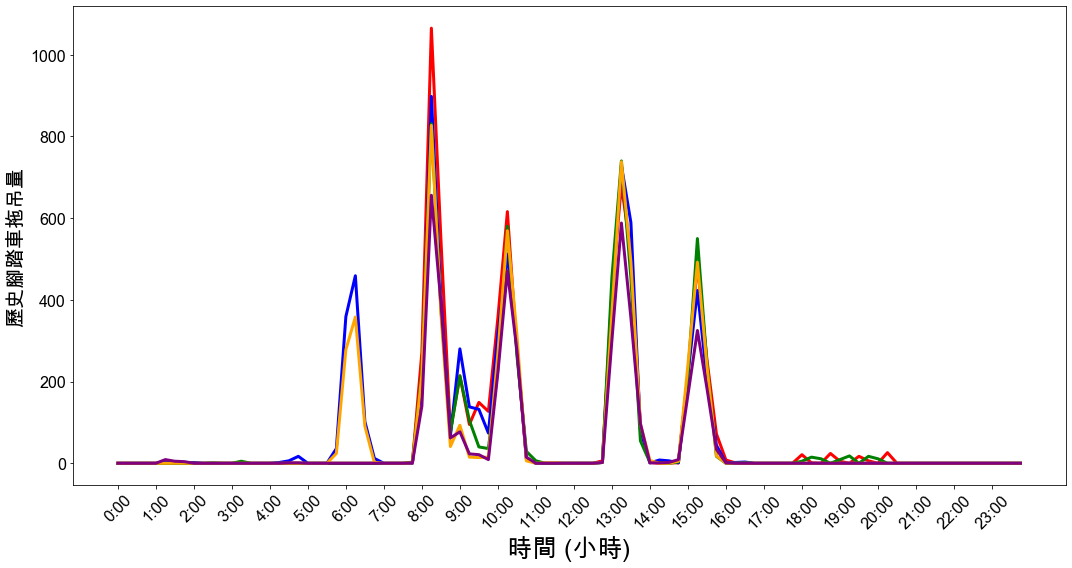

In [ ]:
t = time
fig, ax1 = plt.subplots(1,figsize=(15,8))


for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlabel('時間 (小時)', fontsize=25)
ax1.set_ylabel('歷史腳踏車拖吊量', color='black', fontsize=20)

ax1.plot(t, time_list_history_m, color='red',lw=3)
ax1.plot(t, time_list_history_t, color='b',lw=3)
ax1.plot(t, time_list_history_w, color='green',lw=3)
ax1.plot(t, time_list_history_th, color='orange',lw=3)
ax1.plot(t, time_list_history_f, color='purple',lw=3)

ax1.set_xticks(t[::4])
ax1.set_xticklabels(t[::4], rotation=45)
ax1.tick_params(axis='y', labelcolor='black')


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

歷史拖吊量與資料拖吊量比較

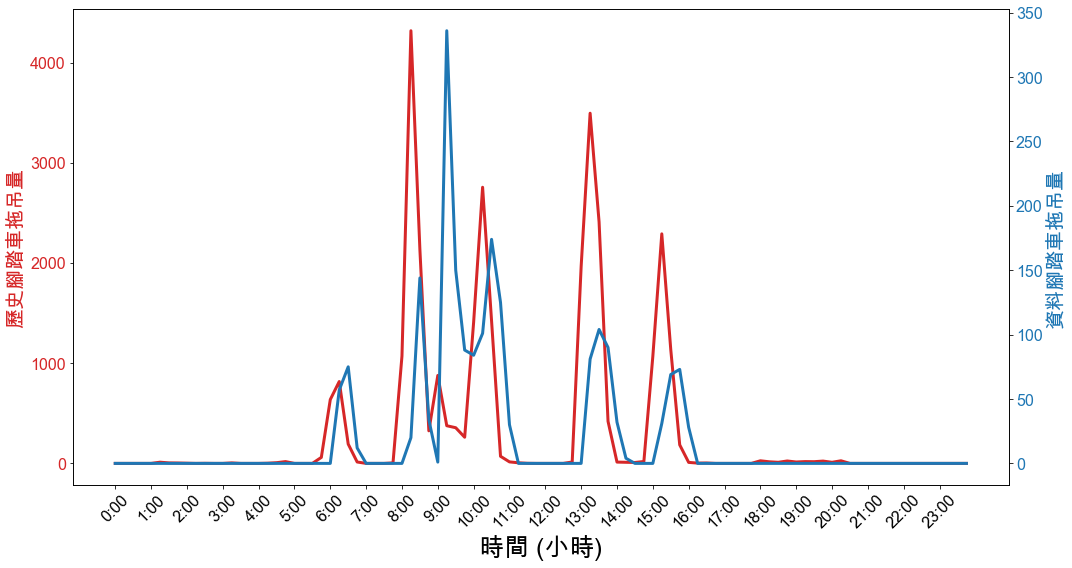

In [ ]:
t = time
data1 = time_list_history
data2 = time_list

fig, ax1 = plt.subplots(1,figsize=(15,8))


for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

color = 'tab:red'
ax1.set_xlabel('時間 (小時)', fontsize=25)
ax1.set_ylabel('歷史腳踏車拖吊量', color=color, fontsize=20)
ax1.plot(t, data1, color=color,lw=3)
ax1.set_xticks(t[::4])
ax1.set_xticklabels(t[::4], rotation=45)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
color = 'tab:blue'
ax2.set_ylabel('資料腳踏車拖吊量', color=color, fontsize=20)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color,lw=3)
ax2.set_xticks(t[::4])
ax2.set_xticklabels(t[::4], rotation=45)
ax2.tick_params(axis='y', labelcolor=color)



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()